In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Imported necessary modules and will import the csv file to work on it.

In [17]:
df = pd.read_csv('Titanic-Dataset.csv')

TO REMOVE NULL VALUES:

In [18]:
a = df.isnull().sum()
df['Age'].fillna(df['Age'].mean())
df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'].fillna(df['Cabin'].mode()[0])
print(a)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


TO REMOVE DUPLICATE VALUES:

In [19]:
dup = df.duplicated()
print(dup.sum())

0


We have already removed the null values but now we have calculated number of duplicates which is 0. So, it means there are no duplicates. Our data is clean now.

2. ANALYZING THE DATA

a) How many Passengers survived on the basis of their sex.

In [20]:
print("Number of people survived: ", df['Survived'].sum())
print("Number of people survived by sex: ", df['Survived'].groupby(df['Sex']).sum())

Number of people survived:  342
Number of people survived by sex:  Sex
female    233
male      109
Name: Survived, dtype: int64


The Graph showing our Statistics.

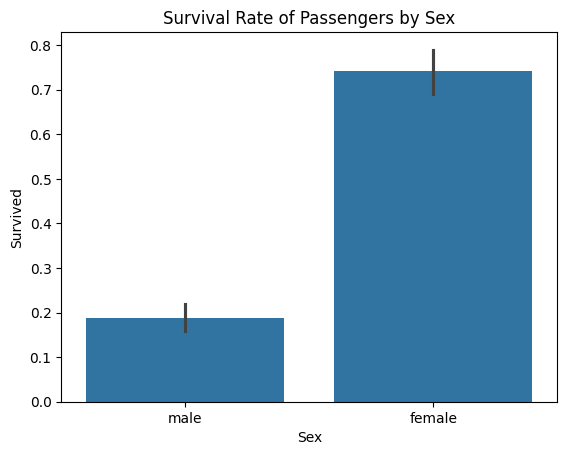

In [21]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate of Passengers by Sex")
plt.show()

By this we can find no. of people who survived in the Titanic address and we can interpret that Females survived the most.

b) How many Passengers survived based on their Passenger Class

In [22]:
print("Passsenger class has highest survival rate")
print(df.groupby('Pclass')['Survived'].mean())

Passsenger class has highest survival rate
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


We can see the values and plot them in a graph.

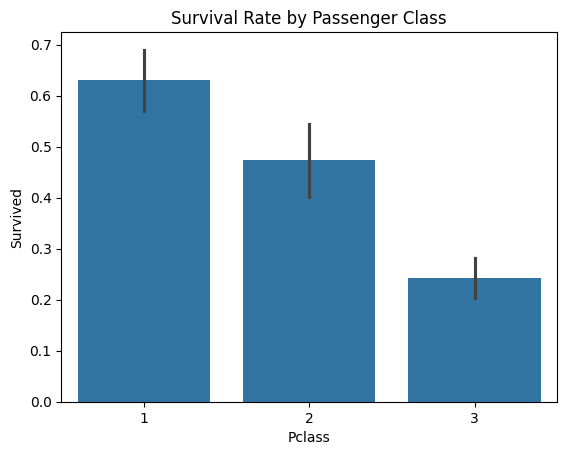

In [23]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

By this chart we can interpret that Survived Passengers of Passenger class 1 are more and of Passenger class 3 are least.

c) survival rate by age group

In [24]:
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
sbyage = df.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by Age Group:")
print(sbyage)

Survival rate by Age Group:
AgeGroup
Child          0.573529
Teen           0.488889
Young Adult    0.350554
Adult          0.417969
Senior         0.356164
Name: Survived, dtype: float64


C:\Users\himan\AppData\Local\Temp\ipykernel_4116\1648601423.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sbyage = df.groupby('AgeGroup')['Survived'].mean()


Graph for showing it

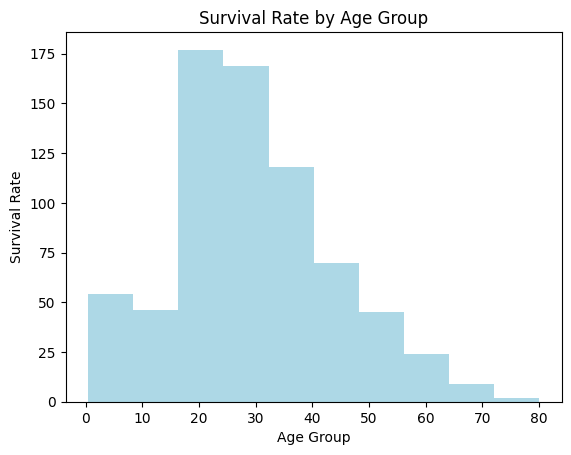

In [25]:
plt.hist(df['Age'], bins=10, color='lightblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

People with age 20 to 30 have highest survival rate and people with 70 to 80 have lowest survival rate

SUMMARY:
1. Females have highest survival rate.
2. First Passenger class has highest chances of survival.
3. Age affects Survival Rate.